## A map of 24 nodes

[(2.7933, 3.694), (2.6067, 4.4254), (2.86, 5.0373), (2.54, 6.2463), (3.1267, 6.4701), (3.7267, 6.8881), (4.4867, 7.4403), (5.5533, 7.4254), (6.3, 7.3955), (7.6333, 6.9179), (7.22, 6.3955), (6.6333, 5.8284), (7.0867, 5.1269), (7.4733, 4.4701), (7.18, 3.709), (6.6867, 2.8284), (6.2067, 2.0522), (5.54, 1.8731), (5.1533, 2.3358), (4.9667, 3.0075), (4.8867, 3.5448), (4.2733, 3.2313), (3.6333, 2.7537), (2.9933, 2.8433)]


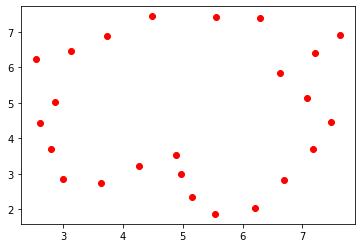

In [76]:
import random
from matplotlib import pyplot as plt 
from math import sqrt

# converting the input matrix into a 2d list
with open("TSP Matrix2.csv") as input:
    cities = [tuple([float(n) for n in line.split(",")]) for line in input.read().splitlines()]

print(cities)

# * operator can be used in conjunction with zip() to unzip the list
x, y = zip(*cities)
plt.scatter(x, y, c="r")
plt.show()

Optimal Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
Optimal Path distance: 22.077328545028728


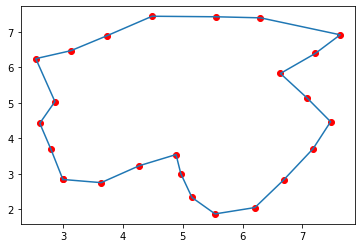

Initial Greedy Path: [0, 1, 2, 3, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 10, 9]
Initial Greedy Path distance: 29.76280437263011


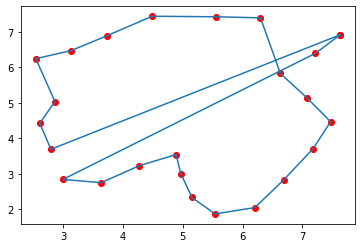

Initial Random Path: [9, 5, 20, 10, 14, 0, 15, 1, 3, 21, 22, 12, 18, 6, 23, 7, 19, 13, 4, 8, 11, 16, 17, 2]
Initial Random Path distance: 67.75639299540929


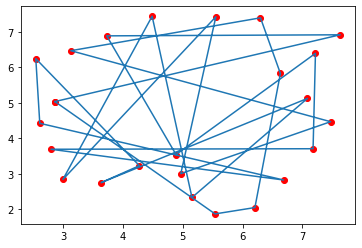

In [77]:
# function to calculate the distance between two cities
def calculate_hypotenuse(cits, a, b):
    x1, y1 = cits[a]
    x2, y2 = cits[b]
    return sqrt( abs(x1-x2)**2 + abs(y1-y2) )

# function to calculate the length of the path
def calculate_distance(cits, path):
    l = len(path)
    total = 0
    for i in range(l):
        total += calculate_hypotenuse(cits, path[i], path[(i+1)%l])
    return total

# function generating a random initial path
def create_initial_random(cits):
    indices = list(range(len(cits)))
    random.shuffle(indices)
    return indices

# function generating the initial path using greedy algorithm
# always choosing the closest unvisited node
def create_initial_greedy(cits, start):
    path = [start]
    while len(path) < len(cits):
        current = path[-1]
        indices = [ind for ind in range(len(cits)) if ind not in path]
        smallest = float("inf")
        next = -1
        for ind in indices:
            if calculate_hypotenuse(cits, current, ind) < smallest:
                smallest = calculate_hypotenuse(cits, current, ind)
                next = ind
        path.append(next)
    return path

# path drawing function
def draw_path(cits, path):
    route = [cits[path[-1]]]
    for n in path:
        route.append(cits[n])
    x, y = zip(*route)
    plt.scatter(x, y, c="r")
    plt.plot(x, y)
    plt.show()

optimal = list(range(len(cities)))
print("Optimal Path:", optimal)
print("Optimal Path distance:", calculate_distance(cities, optimal))
draw_path(cities, optimal)

initial_greedy = create_initial_greedy(cities, 0)
print("Initial Greedy Path:", initial_greedy)
print("Initial Greedy Path distance:", calculate_distance(cities, initial_greedy))
draw_path(cities, initial_greedy)

initial_random = create_initial_random(cities)
print("Initial Random Path:", initial_random)
print("Initial Random Path distance:", calculate_distance(cities, initial_random))
draw_path(cities, initial_random)

Running steepest ascent - choosing from all right-neighbour swaps
Initial route:


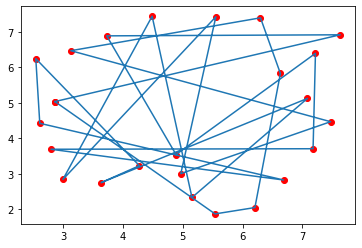

Initial distance =  67.75639299540929
Final route:


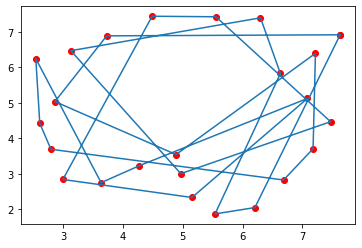

Final distance =  52.72918267855249


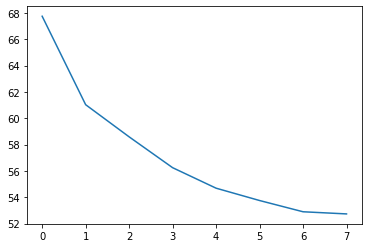

Running steepest ascent - choosing from all right-neighbour swaps
Initial route:


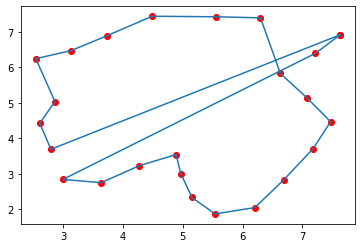

Initial distance =  29.76280437263011
Final route:


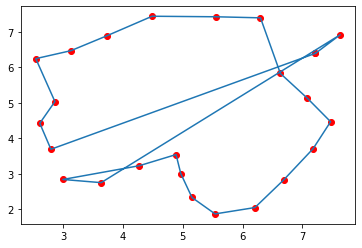

Final distance =  29.666666294180164


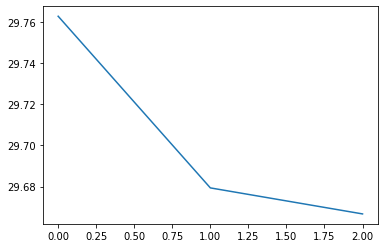

In [78]:
# function that chooses the steepest ascent amongst all right-neighbour swaps
def steepest_ascent(cits, path):
    smallest = calculate_distance(cits, path)
    temp_path = path
    for i in range(len(path)):
        p = list(path)
        temp = p[i]
        p[i] = p[(i+1)%len(p)]
        p[(i+1)%len(p)] = temp
        if calculate_distance(cits, p) < smallest:
            smallest = calculate_distance(cits, p)
            temp_path = p
    return temp_path

def run_steepest(cits, path):
    p = list(path)
    print("Running steepest ascent - choosing from all right-neighbour swaps")
    print("Initial route:")
    draw_path(cits, p)
    print("Initial distance = ", calculate_distance(cits, p))
    no_improvement_for = 0
    dists = []
    while no_improvement_for < 1:
        current_distance = calculate_distance(cits, p)
        dists.append(current_distance)
        new_p = steepest_ascent(cits, p)
        if calculate_distance(cits, new_p) < current_distance:
            p = new_p
            no_improvement_for = 0
        else:
            no_improvement_for += 1
    print("Final route:")
    draw_path(cits, p)
    print("Final distance = ", dists[-1])
    plt.plot(dists)
    plt.show()

run_steepest(cities, initial_random)
run_steepest(cities, initial_greedy)

We can see that the Steepest Ascent Hill climbing algorithm very quickly finds a local optimal solution. However, that solution is final, and it doesn't improve beyond it in future iterations. 

Running simple hillclimbing - swapping two random nodes
Initial route:


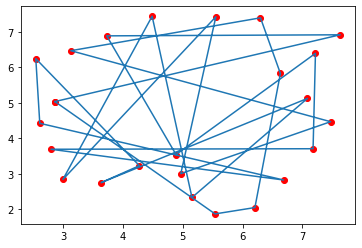

Initial distance =  67.75639299540929
Final route:


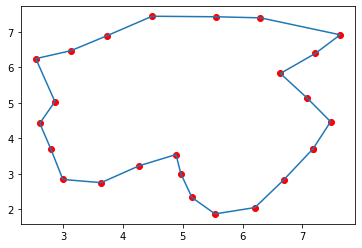

Final distance =  22.077328545028735


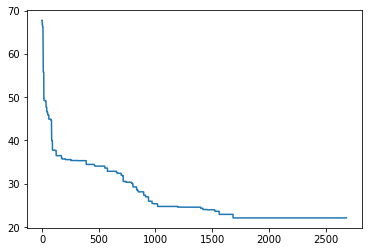

Running simple hillclimbing - swapping two random nodes
Initial route:


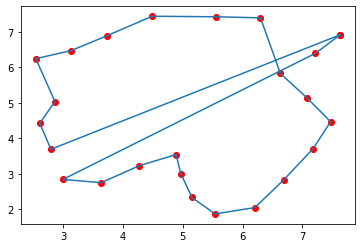

Initial distance =  29.76280437263011
Final route:


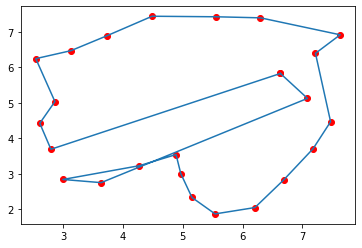

Final distance =  29.063084776153378


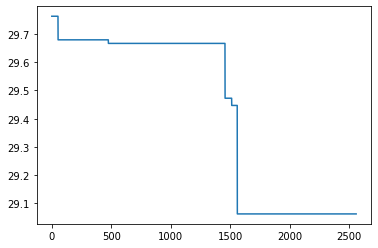

In [83]:
# function that swaps two random nodes
def hill_climbing_random(path):
    p = list(path)
    index1 = random.randrange(0, len(p))
    index2 = index1
    while index2 == index1:
        index2 = random.randrange(0, len(p))
    temp = p[index2]
    p[index2] = p[index1]
    p[index1] = temp
    return p

def run_random(cits, path):
    p = list(path)
    print("Running simple hillclimbing - swapping two random nodes")
    print("Initial route:")
    draw_path(cits, p)
    print("Initial distance = ", calculate_distance(cits, p))
    no_improvement_for = 0
    dists = []
    while no_improvement_for < 1000:
        current_distance = calculate_distance(cits, p)
        dists.append(current_distance)
        new_p = hill_climbing_random(p)
        if calculate_distance(cits, new_p) < current_distance:
            p = new_p
            no_improvement_for = 0
        else:
            no_improvement_for += 1
    print("Final route:")
    draw_path(cits, p)
    print("Final distance = ", dists[-1])
    plt.plot(dists)
    plt.show()

run_random(cities, initial_random)
run_random(cities, initial_greedy)

An algorithm that swaps two random nodes needs to run for more iterations, but doesn't get stuck as quickly, and thus achieves better solutions. Sometimes, as in the example above, the found solution is optimal (this doesn't happen every time!).

Running steepest ascent - choosing from all possible swaps
Initial route:


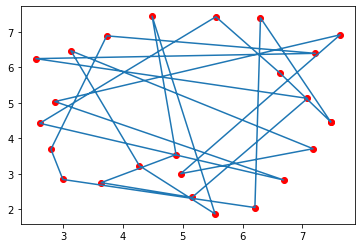

Initial distance =  67.73251862762064
Final route:


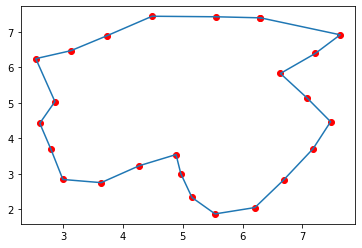

Final distance =  22.077328545028735


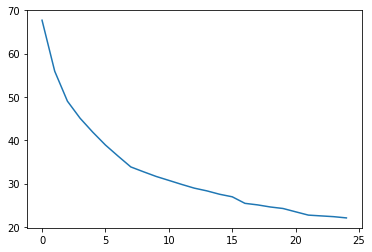

Running steepest ascent - choosing from all possible swaps
Initial route:


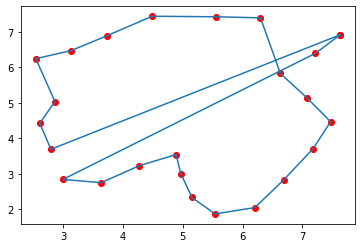

Initial distance =  29.76280437263011
Final route:


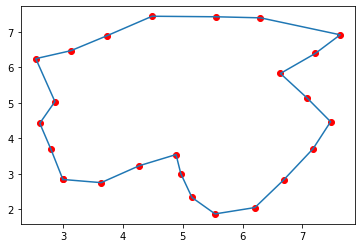

Final distance =  22.077328545028728


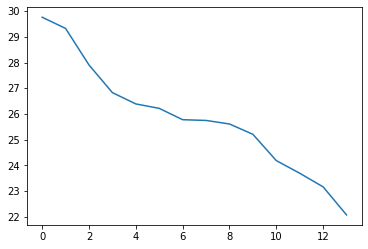

In [66]:
# function that chooses the steepest ascent amongst all possible swaps
def steepest_ascent2(cits, path):
    smallest = calculate_distance(cits, path)
    temp_path = path
    for i in range(len(path)-1):
        for j in range(i+1, len(path)):
            p = list(path)
            temp = p[i]
            p[i] = p[j]
            p[j] = temp
            if calculate_distance(cits, p) < smallest:
                smallest = calculate_distance(cits, p)
                temp_path = p
    return temp_path

def run_steepest2(cits, path):
    p = list(path)
    print("Running steepest ascent - choosing from all possible swaps")
    print("Initial route:")
    draw_path(cits, p)
    print("Initial distance = ", calculate_distance(cits, p))
    no_improvement_for = 0
    dists = []
    while no_improvement_for < 1:
        current_distance = calculate_distance(cits, p)
        dists.append(current_distance)
        new_p = steepest_ascent2(cits, p)
        if calculate_distance(cits, new_p) < current_distance:
            p = new_p
            no_improvement_for = 0
        else:
            no_improvement_for += 1
    print("Final route:")
    draw_path(cits, p)
    print("Final distance = ", dists[-1])
    plt.plot(dists)
    plt.show()

run_steepest2(cities, initial_random)
run_steepest2(cities, initial_greedy)

## A random map of 100 nodes

[(1.4, 3.431), (1.167, 1.928), (3.205, 8.521), (8.338, 9.935), (6.116, 8.412), (7.258, 1.983), (6.589, 9.057), (0.273, 7.914), (8.398, 1.775), (8.214, 1.192), (0.383, 8.544), (4.978, 3.118), (7.4, 2.32), (7.393, 3.886), (2.969, 6.994), (3.448, 0.96), (0.517, 2.249), (7.924, 3.996), (6.077, 6.859), (5.5, 2.097), (6.622, 9.12), (9.742, 5.453), (9.417, 8.535), (2.455, 4.131), (7.246, 0.076), (7.87, 7.284), (7.173, 5.065), (8.91, 7.183), (9.83, 7.08), (3.096, 1.263), (3.184, 5.251), (6.742, 2.437), (1.961, 5.043), (6.808, 8.856), (1.635, 1.483), (5.842, 5.988), (1.433, 7.192), (4.332, 7.471), (9.657, 9.003), (6.521, 2.375), (6.558, 9.59), (9.847, 1.397), (7.599, 3.508), (6.297, 8.943), (2.04, 7.565), (0.419, 0.652), (2.754, 3.986), (7.141, 4.655), (2.542, 6.607), (8.197, 2.365), (3.856, 8.866), (9.976, 0.393), (3.92, 0.038), (7.901, 1.179), (5.924, 3.31), (9.308, 8.407), (7.578, 1.466), (1.376, 4.01), (2.5, 1.74), (8.995, 4.461), (4.086, 5.298), (2.228, 0.031), (5.822, 6.56), (7.829, 3.304

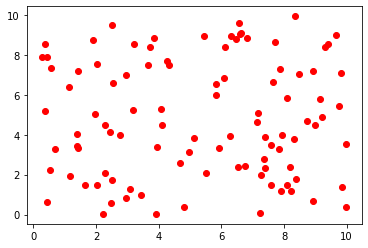

In [67]:
rand_cities = []

for i in range(100):
    a = round(random.uniform(0, 10), 3)
    b = round(random.uniform(0, 10), 3)
    rand_cities.append((a, b))
    

print(rand_cities)

# * operator can be used in conjunction with zip() to unzip the list
x, y = zip(*rand_cities)
plt.scatter(x, y, c="r")
plt.show()

Initial Greedy Path: [0, 72, 71, 16, 1, 34, 85, 58, 88, 29, 15, 69, 79, 61, 52, 74, 19, 95, 11, 89, 54, 87, 13, 17, 91, 63, 42, 82, 12, 5, 56, 98, 9, 53, 8, 49, 31, 39, 47, 26, 75, 99, 25, 90, 27, 28, 55, 22, 38, 3, 77, 33, 93, 43, 6, 20, 40, 4, 84, 18, 62, 35, 37, 94, 97, 70, 2, 50, 76, 66, 44, 36, 83, 78, 86, 7, 10, 65, 57, 23, 46, 80, 32, 30, 60, 92, 81, 14, 48, 45, 24, 96, 51, 41, 73, 59, 64, 68, 21, 67]
Initial Greedy Path distance: 106.95301465902139


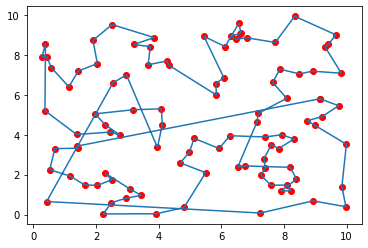

Initial Random Path: [26, 25, 98, 53, 22, 71, 42, 43, 44, 6, 5, 4, 48, 11, 27, 65, 93, 34, 95, 78, 72, 83, 38, 85, 21, 28, 88, 59, 99, 56, 96, 49, 14, 15, 67, 61, 68, 41, 97, 80, 30, 62, 1, 13, 76, 92, 90, 47, 82, 12, 39, 46, 57, 74, 8, 0, 7, 63, 29, 60, 81, 2, 69, 58, 31, 51, 9, 23, 36, 16, 89, 75, 20, 55, 10, 77, 32, 54, 73, 40, 33, 19, 18, 70, 37, 35, 84, 3, 50, 91, 79, 64, 86, 52, 45, 24, 66, 87, 94, 17]
Initial Random Path distance: 401.264018379815


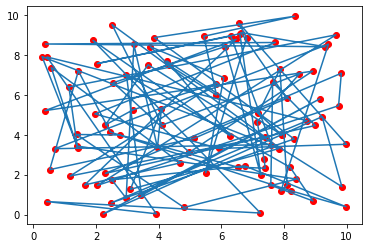

In [68]:
initial_greedy = create_initial_greedy(rand_cities, 0)
print("Initial Greedy Path:", initial_greedy)
print("Initial Greedy Path distance:", calculate_distance(rand_cities, initial_greedy))
draw_path(rand_cities, initial_greedy)

initial_random = create_initial_random(rand_cities)
print("Initial Random Path:", initial_random)
print("Initial Random Path distance:", calculate_distance(rand_cities, initial_random))
draw_path(rand_cities, initial_random)

Running steepest ascent - choosing from all right-neighbour swaps
Initial route:


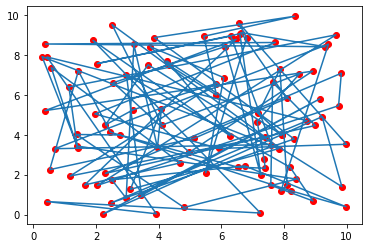

Initial distance =  401.264018379815
Final route:


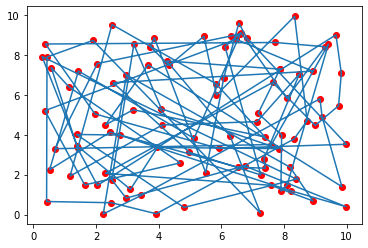

Final distance =  291.81699582254976


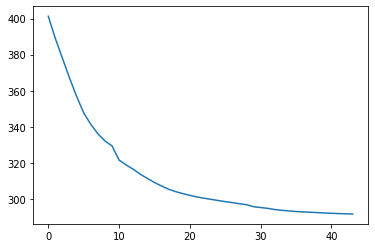

In [69]:
run_steepest(rand_cities, initial_random)

Running steepest ascent - choosing from all right-neighbour swaps
Initial route:


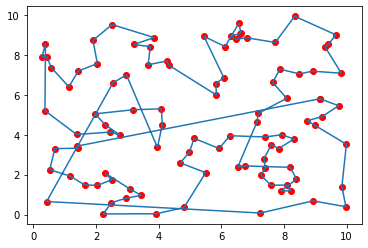

Initial distance =  106.95301465902139
Final route:


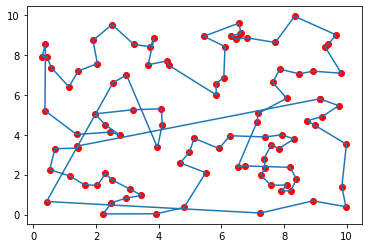

Final distance =  106.25359970014892


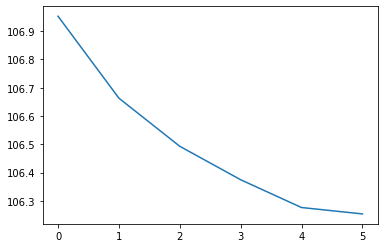

In [70]:
run_steepest(rand_cities, initial_greedy)

Running simple hillclimbing - swapping two random nodes
Initial route:


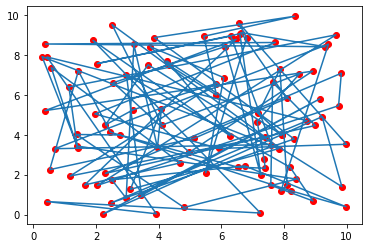

Initial distance =  401.264018379815
Final route:


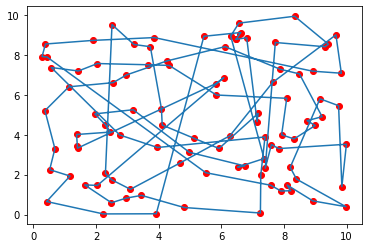

Final distance =  149.47946179795795


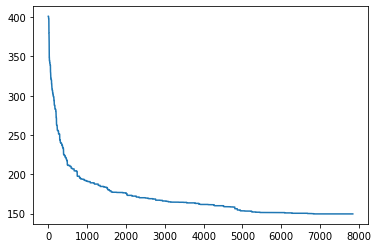

In [71]:
run_random(rand_cities, initial_random)

Running simple hillclimbing - swapping two random nodes
Initial route:


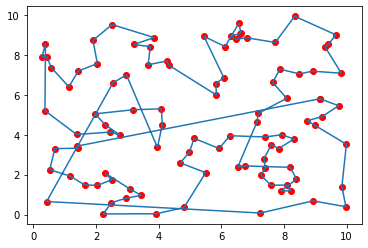

Initial distance =  106.95301465902139
Final route:


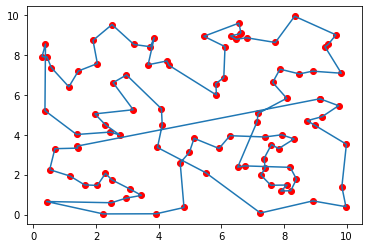

Final distance =  102.47719810082138


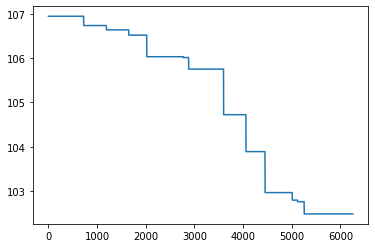

In [72]:
run_random(rand_cities, initial_greedy)

Running steepest ascent - choosing from all possible swaps
Initial route:


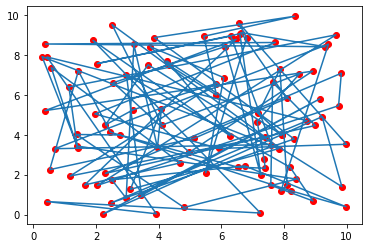

Initial distance =  401.264018379815
Final route:


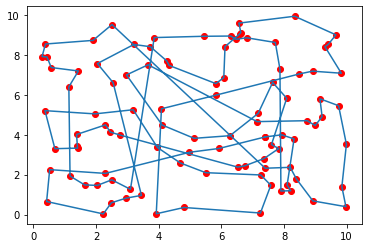

Final distance =  124.61960784656121


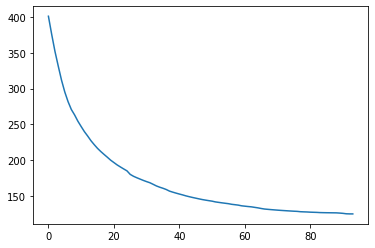

In [73]:
run_steepest2(rand_cities, initial_random)

Running steepest ascent - choosing from all possible swaps
Initial route:


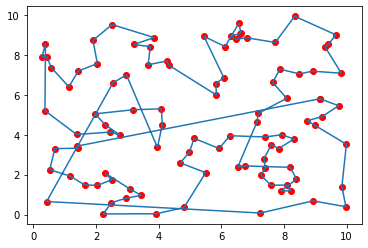

Initial distance =  106.95301465902139
Final route:


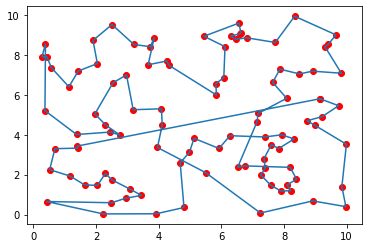

Final distance =  101.6639179519084


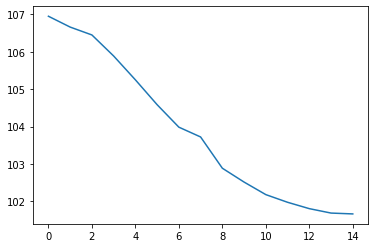

In [74]:
run_steepest2(rand_cities, initial_greedy)